## We will compare the performance of a GP trained using two methods. 
> Min Max Latin HyperCube Sampling

> Active learning sampling (Emukit)

### Generate 50 initial design points using LHS 

In [1]:
from emukit.core.initial_designs.latin_design import LatinDesign
from emukit.core import ParameterSpace, ContinuousParameter

import run_simple_energy_loss_parallel_pool

import pandas as pd
import numpy as np

import os

In [2]:
simulation = run_simple_energy_loss_parallel_pool.run_simulation

In [3]:
pT_range = (1, 10, 10) # Compute more observable than needed to avoid boundry unstabilities.
pT_obs = [5] # p_T Observables we will use for the analysis

In [4]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.1,0.4 ),
                                  ContinuousParameter('exponent_inel', -2, 2),
                                  ContinuousParameter('exponent_el', -2, 2),
                                  ContinuousParameter('scale_inel', 0.1, 0.4),
                                  ContinuousParameter('scale_el', 0.1, 0.4)])

In [5]:
param_keys = ['alpha_s','exponent_inel','exponent_el','scale_inel', 'scale_el']
result_keys = ['pT {} GeV'.format(str(i)) for i in np.linspace(*pT_range)]
clms_names = np.hstack((['step'],param_keys,result_keys))
print(clms_names)

['step' 'alpha_s' 'exponent_inel' 'exponent_el' 'scale_inel' 'scale_el'
 'pT 1.0 GeV' 'pT 2.0 GeV' 'pT 3.0 GeV' 'pT 4.0 GeV' 'pT 5.0 GeV'
 'pT 6.0 GeV' 'pT 7.0 GeV' 'pT 8.0 GeV' 'pT 9.0 GeV' 'pT 10.0 GeV']


In [6]:
start_n = 50
if os.path.exists('lhs_step.csv'):
    lhs_df = pd.read_csv('lhs_step.csv')
    
else:
    for n in range(start_n,105,5):
        design = LatinDesign(parameter_space) 
    # Keep the first 50 as initial training point for active learning. 
    # Use all 100 to train a GP
        num_data_points = n 
        X = design.get_samples(num_data_points)
        Y_all = simulation(X,*pT_range)
        step = n* np.ones(shape=(num_data_points,1))
        X = np.hstack((step, X))
        if n == n_start:
            X_b = X
            Y_b = Y_all
        else:
            X_b = np.vstack((X_b, X))
            Y_b = np.vstack((Y_b, Y_all))
    lhs_data=np.hstack((X_b,Y_b))
    print(lhs_data.shape)
    print('saving the lhs to a csv file')
    lhs_df = pd.DataFrame(lhs_data,columns=clms_names)
    # Write dataframe to file
    lhs_df.to_csv('lhs_step.csv', index = False)

In [7]:
iternation = np.sum(np.arange(start_n, 105, 5))
print(iternation)

825


In [8]:
lhs_df.shape

(825, 16)

In [9]:
lhs_df[lhs_df['step'] == 100 ]

,step,alpha_s,exponent_inel,exponent_el,scale_inel,scale_el,pT 1.0 GeV,pT 2.0 GeV,pT 3.0 GeV,pT 4.0 GeV,pT 5.0 GeV,pT 6.0 GeV,pT 7.0 GeV,pT 8.0 GeV,pT 9.0 GeV,pT 10.0 GeV
725,100.0,0.2935,-0.86,-1.30,0.2395,0.2965,0.589727,0.667227,0.176257,0.099063,0.072206,0.059936,0.053472,0.049409,0.045601,0.040727
726,100.0,0.3415,-1.46,0.86,0.3355,0.1825,0.661242,0.844943,0.052186,0.016197,0.008636,0.005960,0.004706,0.003950,0.003329,0.002709
727,100.0,0.2785,-1.30,-1.18,0.3535,0.2275,0.719023,0.847141,0.136736,0.058563,0.034696,0.024507,0.019289,0.015992,0.013108,0.010055
728,100.0,0.3115,1.58,0.30,0.3955,0.3235,0.684898,0.744296,0.320940,0.226982,0.189643,0.171403,0.161518,0.155366,0.149489,0.141282
729,100.0,0.2875,-0.38,0.66,0.2035,0.2515,0.746558,0.832228,0.266974,0.164462,0.126271,0.107955,0.097945,0.091597,0.085778,0.078334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,100.0,0.1825,0.18,0.82,0.2095,0.2305,0.887916,0.929747,0.599582,0.501488,0.457255,0.433927,0.420605,0.412165,0.404301,0.393393
821,100.0,0.1495,-1.02,1.50,0.2665,0.2005,0.924915,0.962356,0.661024,0.567205,0.523934,0.500750,0.487333,0.478762,0.470843,0.460004
822,100.0,0.1045,-0.78,-1.38,0.1885,0.3115,0.929557,0.945102,0.813919,0.766304,0.743125,0.730574,0.723478,0.719170,0.715005,0.708417
823,100.0,0.2995,-1.82,-0.74,0.3475,0.3385,0.661090,0.837570,0.055541,0.016092,0.007490,0.004434,0.003015,0.002169,0.001507,0.000901


In [10]:
start_n = 50
#X_all = np.array(lhs_df.iloc[:,:5])
#Y_all = np.array(lhs_df.iloc[:,5:])
# Start with the 50 sample LHS design
X_init = np.array(lhs_df[lhs_df['step'] == start_n ])[:,1:6]
Y_init = np.array(lhs_df[lhs_df['step'] == start_n ])[:,6:]

print(f'Shape of initial design {X_init.shape} and initial observables {Y_init.shape}')

Shape of initial design (50, 5) and initial observables (50, 10)


In [11]:
# Load validation data
validation_df = pd.read_csv('validation.csv', index_col=0)
X_valid = np.array(validation_df.iloc[:,:5])
Y_valid = np.array(validation_df.iloc[:,5:])
print(f'Shape of validation design {X_valid.shape} and validation observables {Y_valid.shape}')
validation_df.head()

Shape of validation design (100, 5) and validation observables (100, 10)


,alpha_s,exponent_inel,exponent_el,scale_inel,scale_el,pT 1.0 GeV,pT 2.0 GeV,pT 3.0 GeV,pT 4.0 GeV,pT 5.0 GeV,pT 6.0 GeV,pT 7.0 GeV,pT 8.0 GeV,pT 9.0 GeV,pT 10.0 GeV
0,0.139880,1.233532,0.023331,0.277208,0.310282,0.923065,0.944544,0.765945,0.703582,0.673583,0.657323,0.648015,0.642235,0.636743,0.628520
1,0.332736,-0.131905,0.751403,0.212024,0.279861,0.688620,0.791497,0.175990,0.092273,0.064660,0.052266,0.045716,0.041578,0.037848,0.033352
2,0.370226,1.457209,-0.285213,0.201070,0.190545,0.568233,0.665193,0.114913,0.051152,0.031581,0.023231,0.018968,0.016290,0.013855,0.011014
3,0.259227,-0.766722,-1.405136,0.164316,0.136741,0.803727,0.875761,0.366005,0.254727,0.210319,0.188285,0.176045,0.168278,0.161129,0.151751
4,0.276825,-0.279757,-0.899501,0.178222,0.316869,0.651347,0.718871,0.258172,0.168719,0.135002,0.118950,0.110332,0.104940,0.099839,0.092970


## Need to write a function that runs iteratively adding more design points and train both type of gps. 
> plots should have how rms error decreases for the two types with time

> How predictions at the truth compare at each steps of sampling


In [12]:
prior_ranges= {'alpha_s':(0.1,0.4), 'exponent_inel':(-2,2), 'exponent_el':(-2,2), 'scale_inel':(0.1, 0.4), 'scale_el':(0.1, 0.4)}
true_values= {'alpha_s': 0.2, 'exponent_inel': -1, 'exponent_el': 1, 'scale_inel': 0.3, 'scale_el': 0.3}
name_to_position =  {'alpha_s':0, 'exponent_inel':1, 'exponent_el':2, 'scale_inel':3, 'scale_el':4}
truth = np.array([true_values['alpha_s'],  true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']]).reshape(1,-1)

In [13]:
# define the two types of gp we will use
from GPy.kern import RBF, White
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

In [14]:
# size of possible variation of parameters
ptp = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])\
-np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])

#gp_array = []

rbf_kern_1 =  RBF(input_dim=5, variance= 1, lengthscale=ptp, ARD=True)
my_kernel_1 = rbf_kern_1
model_gpy_1 = GPRegression(X=X_init, Y=Y_init[:, pT_obs], kernel=my_kernel_1, noise_var=0.01**2)
model_gpy_1.optimize_restarts(num_restarts = 30)
model_emukit_1 = GPyModelWrapper(model_gpy_1, n_restarts=30)
    
rbf_kern_2 =  RBF(input_dim=5, variance= 1, lengthscale=ptp, ARD=True)
my_kernel_2 = rbf_kern_2
model_gpy_2 = GPRegression(X=X_init, Y=Y_init[:, pT_obs], kernel=my_kernel_2, noise_var=0.01**2)
model_gpy_2.optimize_restarts(num_restarts = 30)
model_emukit_2 = GPyModelWrapper(model_gpy_2, n_restarts=30)
    
gp_array = [model_emukit_1, model_emukit_2]

Optimization restart 1/30, f = -105.99134979651294
Optimization restart 2/30, f = -105.99134979927003
Optimization restart 3/30, f = -105.99134980979825
Optimization restart 4/30, f = -105.9913498255614
Optimization restart 5/30, f = -105.99134973400716
Optimization restart 6/30, f = -105.99134963631955
Optimization restart 7/30, f = -105.99134982948775
Optimization restart 8/30, f = -105.99134980129922
Optimization restart 9/30, f = -105.99134975545871
Optimization restart 10/30, f = -105.99134982687923
Optimization restart 11/30, f = -105.9913498096052
Optimization restart 12/30, f = -105.9913497859045
Optimization restart 13/30, f = -105.9913498122973
Optimization restart 14/30, f = -105.99134982696097
Optimization restart 15/30, f = -105.99134982798529
Optimization restart 16/30, f = -105.99134970629152
Optimization restart 17/30, f = -105.99134981063189
Optimization restart 18/30, f = -105.99134979905858
Optimization restart 19/30, f = -105.99134979684355
Optimization restart 20/3

In [15]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance
from emukit.experimental_design import ExperimentalDesignLoop

In [16]:
def f(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(f'design is {design}')
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

In [17]:
def emu_predict(X, gp):
    y, variance_dy = gp.predict(X)
    dy = np.sqrt(variance_dy)
    #y = scaler_0.inverse_transform(scaled_y)
    #dy = scaled_dy* scaler_0.scale_
    return y, dy.flatten()

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
def compare_gp(gp_1,gp_2):
    #make a regular grid to plot our Emulator predictions
    n_plot_pts = 100
    sim_pnt = 10
    for name in prior_ranges.keys():
        test_points = np.repeat(truth, 100, axis = 0)
        pos = name_to_position[name]
        test_points[:,pos] = np.linspace(*prior_ranges[name],100)
        simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
        plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),pos], simulation_out[:,0],'ro', label=f'sim {pT_obs[0]} GeV')
#plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,1],'go', label='sim pT_obs[1]')
#plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
        gp_y0, gp_dy0 = emu_predict(test_points, gp_1)
        gp_y1, gp_dy1 = emu_predict(test_points, gp_2)
#gp_y2, gp_dy2 = emu_predict2(test_points)


        plt.plot(test_points[:,pos], gp_y0[:,0], color='red', label='Emukit')
        plt.plot(test_points[:,pos], gp_y1[:,0], color='blue', label='lhs')
#plt.plot(test_points[:,0], gp_y2[:,0], color='blue', label='pT_obs[2]')
        plt.fill_between(test_points[:,pos], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
        plt.fill_between(test_points[:,pos], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')
#plt.fill_between(test_points[:,0], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
#                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

        plt.xlabel(name)
        plt.ylabel(r'$R_{AA}$')
        plt.title(f'LHS {gp_1.X.shape[0]}, Emukit {gp_2.X.shape[0]}')
        plt.legend()
        plt.tight_layout(True)

        plt.show()
        
    gp1_validation,_ = emu_predict(X_valid,gp_1)
    gp2_validation,_ = emu_predict(X_valid,gp_2)
    validation_score = [mse(Y_valid[:,pT_obs[0]],gp1_validation, squared=False),
                        mse(Y_valid[:,pT_obs[0]],gp2_validation, squared=False)]
    return validation_score

In [19]:
lls = np.random.uniform(size=10)
lls

array([0.38450326, 0.47818036, 0.06709748, 0.93437232, 0.27085128,
       0.31352493, 0.56018951, 0.42742407, 0.9503989 , 0.94468677])

In [20]:
np.argsort(lls)

array([2, 4, 5, 0, 7, 1, 6, 3, 9, 8])

In [21]:
np.delete(lls, np.argsort(lls)[-1:],axis=0)

array([0.38450326, 0.47818036, 0.06709748, 0.93437232, 0.27085128,
       0.31352493, 0.56018951, 0.42742407, 0.94468677])

In [23]:
def lhs_max_var(model, lhs_design, batch_size):
    x_old = model.X
    y_old = model.Y
    _, variance = emu_predict(lhs_design, model)
    max_var_index = np.argsort(variance)[-batch_size:]
    x_new = lhs_design[max_var_index,:]
    y_new = f(x_new)
    x = np.vstack((x_old, x_new))
    y = np.vstack((y_old, y_new))
    model.set_data(x, y)
    model.optimize()
    lhs_design = np.delete(lhs_design, max_var_index, axis = 0)
    print(f'Shape of the updated design {lhs_design.shape}')
    return model, lhs_design

Working on design 2Working on design 4

Working on design 5Working on design 3

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small




Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.69203782081604 S
Total run time for the simulations 1.52 minutes


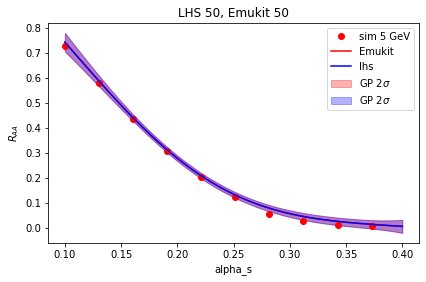

Working on design 1Working on design 3

Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 5Working on design 4


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 9
Working on design 8
Working on design 10
Total run time for the simulations 0.86 minutes


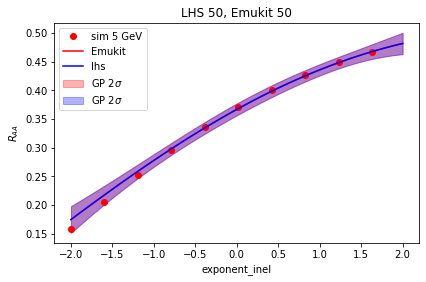

Working on design 3
Working on design 5Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


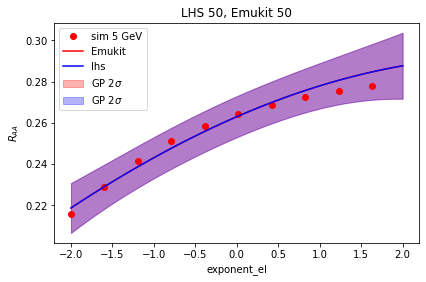

Working on design 3Working on design 4Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


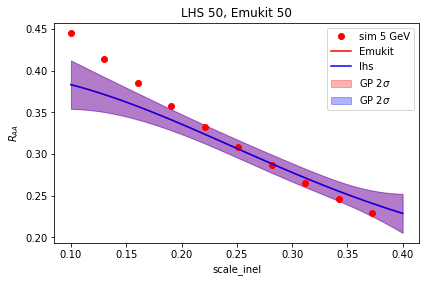

Working on design 4Working on design 3
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2
Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.92 minutes


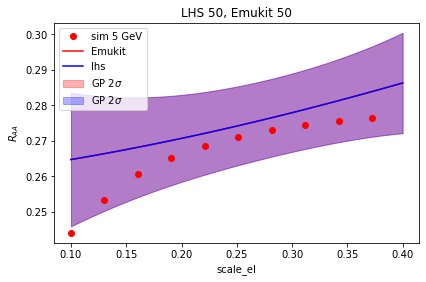

######################
AL before hyperparameters are


Name : GP regression
Objective : -105.99134983161693
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.1784008723673245  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  1.4532295351663076e-05  |      +ve      |        
design is [[ 0.14875  1.41    -1.99     0.37375  0.34675]
 [ 0.39925  0.95     1.91     0.15625  0.12025]
 [ 0.17725 -1.95    -1.05     0.10675  0.29275]
 [ 0.34825  1.53    -1.77     0.10525  0.36775]
 [ 0.36775 -1.69    -1.73     0.11125  0.11575]]
Working on design 4Working on design 3

Working on design 2Working on design 5Working on design 1




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

For model parameters [ 0.34825  1.53    -1.77     0.10525  0.36775] takes 110.8166172504425 S
Total run time for the simulations 1.85 minutes
Optimization restart 1/30, f = -116.18109951967458
Optimization restart 2/30, f = -116.18109949633765
Optimization restart 3/30, f = -116.18109951701368
Optimization restart 4/30, f = -116.18109950573196
Optimization restart 5/30, f = -116.18109951409886
Optimization restart 6/30, f = -116.18109950959516
Optimization restart 7/30, f = -116.1810994868409
Optimization restart 8/30, f = -116.18109941721053
Optimization restart 9/30, f = -116.1810995127782
Optimization restart 10/30, f = -116.18109952175405
Optimization restart 11/30, f = -116.1810994737784
Optimization restart 12/30, f = -116.181099518669
Optimization restart 13/30, f = -116.18109946695031
Optimization restart 14/30, f = -116.18109944043958
Optimization restart 15/30, f = -116.18109948330518
Optimization restart 16/30, f = -116.18109945941991
Optimization restart 17/30, f = -116.181

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 64.92974829673767 S
Total run time for the simulations 1.51 minutes


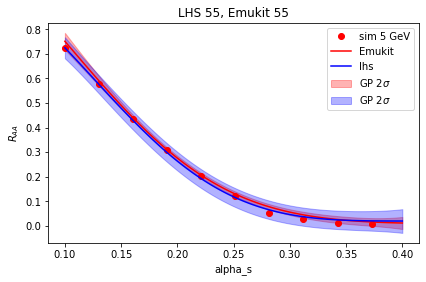

Working on design 4
Working on design 3Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2
Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


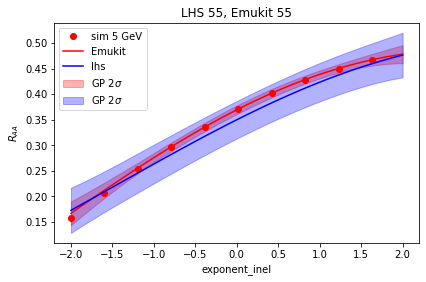

Working on design 3
Working on design 4
Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


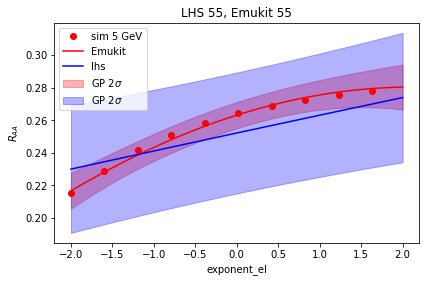

Working on design 3Working on design 4

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 7Working on design 6

Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


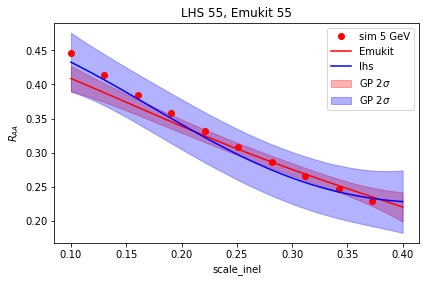

Working on design 3Working on design 4

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.93 minutes


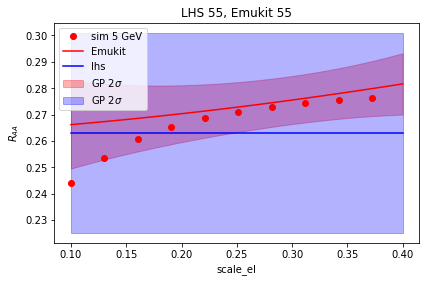

#################### 
 ######################
Validation score for 0 iteration AL 0.019762395059013928 , LHS 0.01851498941222219
######################
AL before hyperparameters are


Name : GP regression
Objective : -116.18109952175405
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.16231679770516916  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  8.754611481219622e-06  |      +ve      |        
design is [[ 0.10525 -1.67     0.71     0.24025  0.14875]
 [ 0.10675 -1.47     1.75     0.21775  0.21625]
 [ 0.11125 -0.27     1.03     0.38425  0.37525]
 [ 0.37225 -1.19     1.41     0.12025  0.13975]
 [ 0.37525 -1.91     1.27     0.15025  0.26425]]
Working on design 1Working on design 4
Working on design 5Working on design 2

Working on design 3

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Total run time for the simulations 0.57 minutes
Optimization restart 1/30, f = -131.8991367079506
Optimization restart 2/30, f = -131.8991367364087
Optimization restart 3/30, f = -131.89913659710098
Optimization restart 4/30, f = -131.8991362728283
Optimization restart 5/30, f = -131.89913624048833
Optimization restart 6/30, f = -131.8991366185835
Optimization restart 7/30, f = -131.89913671943617
Optimization restart 8/30, f = -131.89913671590415
Optimization restart 9/30, f = -131.89913672078177
Optimization restart 10/30, f = -131.8991367364964
Optimization restart 11/30, f = -131.89913670929198
Optimization restart 12/30, f = -131.89913673320098
Optimization restart 13/30, f = -131.89913629934208
Optimization restart 14/30, f = -131.89913673808155
Optimization restart 15/30, f = -131.8991367036559
Optimization restart 16/30, f = -131.8991366704303
Optimization restart 17/30, f = -131.8991367364505
Optimization restart 18/30, f = -131.89913673736766
Optimization restart 19/30, f = -

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 2/30, f = -133.03651026077955
Optimization restart 3/30, f = -133.0365108810393
Optimization restart 4/30, f = -133.03640141675436
Optimization restart 5/30, f = -133.03651105553223
Optimization restart 6/30, f = -133.0365106503911
Optimization restart 7/30, f = -133.0365106086652
Optimization restart 8/30, f = -133.03651030475638
Optimization restart 9/30, f = -133.0365110668964
Optimization restart 10/30, f = -133.03650985712693
Optimization restart 11/30, f = -133.0365095143918
Optimization restart 12/30, f = -133.0365040320476
Optimization restart 13/30, f = -133.03651057080342
Optimization restart 14/30, f = -133.0365104756604
Optimization restart 15/30, f = -133.0365109256951
Optimization restart 16/30, f = -133.0365090083893
Optimization restart 17/30, f = -133.03651014193917
Optimization restart 18/30, f = -133.03650943536636
Optimization restart 19/30, f = -133.0365089203459
Optimization restart 20/30, f = -133.0365111061418
Optimization restart 21/30, f =

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.964435338974 S
Total run time for the simulations 1.53 minutes


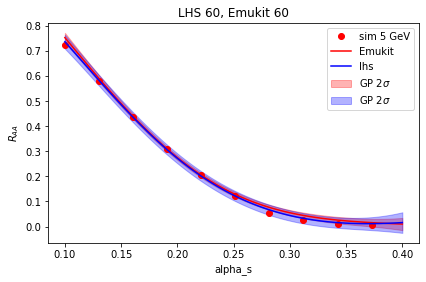

Working on design 3Working on design 4

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7Working on design 8

Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


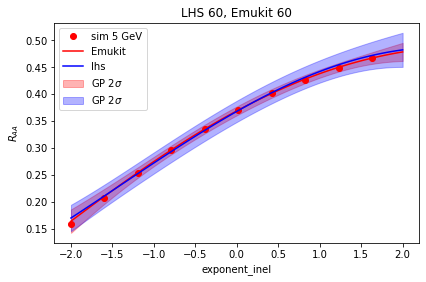

Working on design 3Working on design 4

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


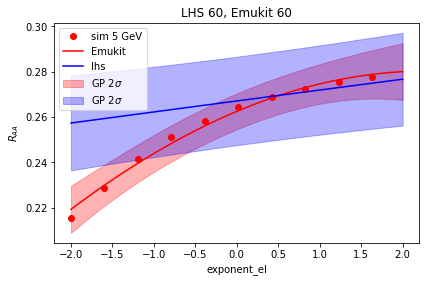

Working on design 3Working on design 4

Working on design 5
Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


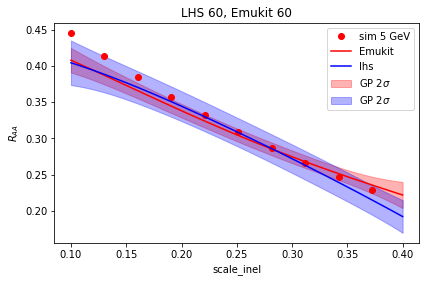

Working on design 5Working on design 4Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.93 minutes


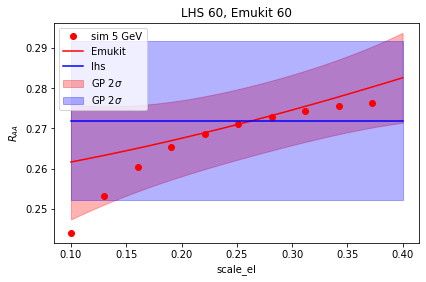

#################### 
 ######################
Validation score for 1 iteration AL 0.019414674451338765 , LHS 0.018932612840580083
######################
AL before hyperparameters are


Name : GP regression
Objective : -131.89913673808155
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.16712193951621138  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  8.556359315310514e-06  |      +ve      |        
design is [[ 0.31525  1.69     1.85     0.12925  0.31975]
 [ 0.15025  1.91     1.63     0.11875  0.10675]
 [ 0.39175  1.17     1.01     0.10075  0.31075]
 [ 0.39625  1.71    -0.15     0.25525  0.38275]
 [ 0.21625  1.99    -0.85     0.13825  0.11125]]
Working on design 3Working on design 5Working on design 4

Working on design 2Working on design 1




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

For model parameters [0.39175 1.17    1.01    0.10075 0.31075] takes 72.20922636985779 S
Total run time for the simulations 1.20 minutes
Optimization restart 1/30, f = -142.62337970589294
Optimization restart 2/30, f = -142.6233797307115
Optimization restart 3/30, f = -142.623379764518
Optimization restart 4/30, f = -142.6233797315004
Optimization restart 5/30, f = -142.6233797715293
Optimization restart 6/30, f = -142.62337970551573
Optimization restart 7/30, f = -142.62337976809172
Optimization restart 8/30, f = -142.6233797410694
Optimization restart 9/30, f = -142.62337976551726
Optimization restart 10/30, f = -142.6233796833486
Optimization restart 11/30, f = -142.6233797615904
Optimization restart 12/30, f = -142.62337977552028
Optimization restart 13/30, f = -142.62337976338844
Optimization restart 14/30, f = -142.62337960681512
Optimization restart 15/30, f = -142.62337966800177
Optimization restart 16/30, f = -142.62337970542296
Optimization restart 17/30, f = -142.62337975951

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 3/30, f = -135.75179135882792
Optimization restart 4/30, f = -135.75179135089596
Optimization restart 5/30, f = -135.75179135812027
Optimization restart 6/30, f = -135.7517911757655
Optimization restart 7/30, f = -135.75179135936884
Optimization restart 8/30, f = -135.75179132675456
Optimization restart 9/30, f = -135.7517913449085
Optimization restart 10/30, f = -135.7517913349756
Optimization restart 11/30, f = -135.75179101944929
Optimization restart 12/30, f = -135.75179130630886
Optimization restart 13/30, f = -135.75179131315213
Optimization restart 14/30, f = -135.75179135536746
Optimization restart 15/30, f = -135.75179135782344
Optimization restart 16/30, f = -135.75179135511337
Optimization restart 17/30, f = -135.75179130324344
Optimization restart 18/30, f = -135.75179125549846
Optimization restart 19/30, f = -135.75179122314444
Optimization restart 20/30, f = -135.75179134951753
Optimization restart 21/30, f = -135.76384294098713
Optimization restart 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 67.11803388595581 S
Total run time for the simulations 1.55 minutes


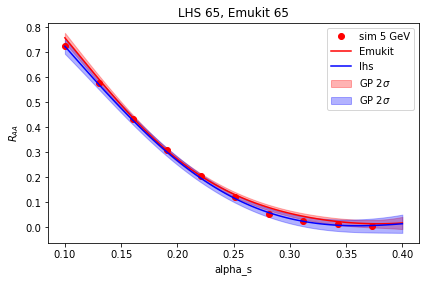

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


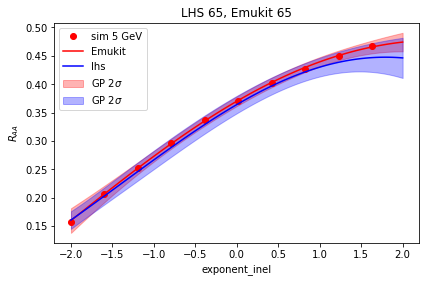

Working on design 3
Working on design 4


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2
Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


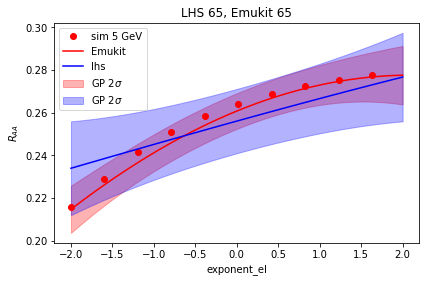

Working on design 3Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5
Working on design 1
Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 9
Working on design 8
Working on design 10
Total run time for the simulations 0.86 minutes


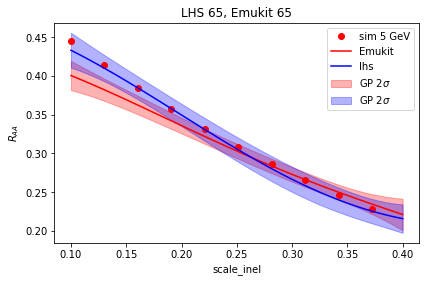

Working on design 3Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.92 minutes


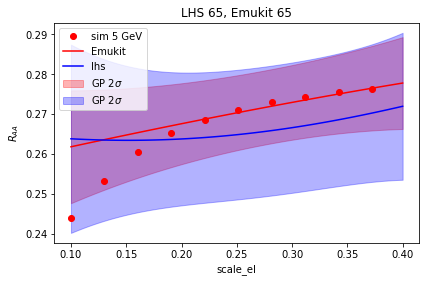

#################### 
 ######################
Validation score for 2 iteration AL 0.02258211968446566 , LHS 0.017281905009778463
######################
AL before hyperparameters are


Name : GP regression
Objective : -142.6233797773789
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.1709696217748848  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  1.0259236200266944e-05  |      +ve      |        
design is [[ 0.13225  1.79     1.05     0.34225  0.35875]
 [ 0.30625 -1.85     1.77     0.36775  0.31825]
 [ 0.20725 -0.85    -1.79     0.39625  0.13075]
 [ 0.38275 -0.39    -1.35     0.38575  0.15775]
 [ 0.10375  1.45    -0.79     0.17725  0.24325]]
Working on design 3Working on design 5
Working on design 4Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

For model parameters [ 0.30625 -1.85     1.77     0.36775  0.31825] takes 72.1861937046051 S
Total run time for the simulations 1.20 minutes
Optimization restart 1/30, f = -152.05924063365626
Optimization restart 2/30, f = -152.05924063493575
Optimization restart 3/30, f = -152.0592405060216
Optimization restart 4/30, f = -84.05236738061053
Optimization restart 5/30, f = -152.05924066028524
Optimization restart 6/30, f = -152.05924065368717
Optimization restart 7/30, f = -152.05924055950146
Optimization restart 8/30, f = -152.05924050888322
Optimization restart 9/30, f = -152.05924065873356
Optimization restart 10/30, f = -152.05924034878922
Optimization restart 11/30, f = -152.05924064862148
Optimization restart 12/30, f = -152.05924065824956
Optimization restart 13/30, f = -150.1615871608614
Optimization restart 14/30, f = -152.05924066242045
Optimization restart 15/30, f = -152.05924058385904
Optimization restart 16/30, f = -152.05924059377352
Optimization restart 17/30, f = -152.05

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.98298907279968 S
Total run time for the simulations 1.53 minutes


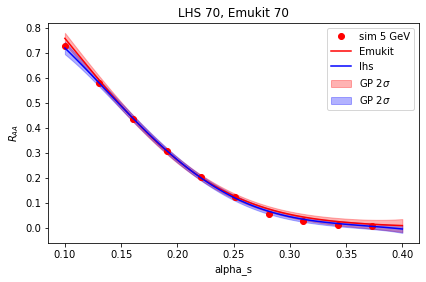

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


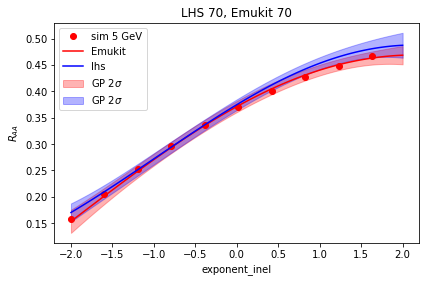

Working on design 3
Working on design 4Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


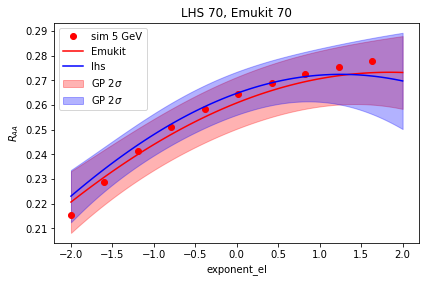

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


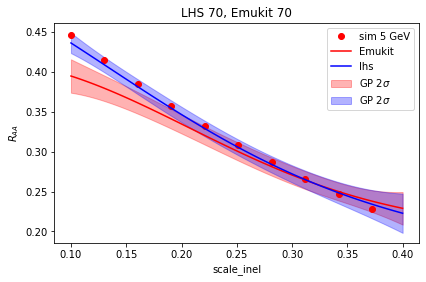

Working on design 4Working on design 5Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.93 minutes


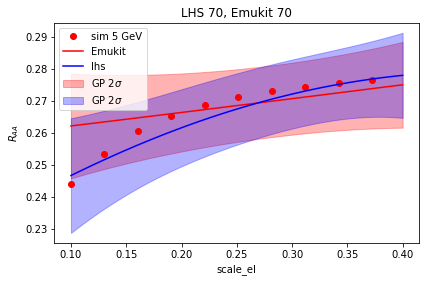

#################### 
 ######################
Validation score for 3 iteration AL 0.020331076095606714 , LHS 0.01340706722573051
######################
AL before hyperparameters are


Name : GP regression
Objective : -152.05924066266257
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.13886563991603598  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  1.7128711221970196e-05  |      +ve      |        
design is [[ 0.28825 -1.87     0.75     0.12625  0.11425]
 [ 0.38575 -1.65    -1.41     0.19975  0.27775]
 [ 0.39775 -1.29     1.89     0.28525  0.27175]
 [ 0.13825  1.11     0.83     0.39475  0.24025]
 [ 0.36025  1.63    -0.95     0.38725  0.10375]]
Working on design 3Working on design 5Working on design 4

Working on design 1Working on design 2




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

For model parameters [ 0.39775 -1.29     1.89     0.28525  0.27175] takes 71.82468914985657 S
Total run time for the simulations 1.20 minutes
Optimization restart 1/30, f = -167.63757850230985
Optimization restart 2/30, f = -167.63757830893317
Optimization restart 3/30, f = -167.63757858275153
Optimization restart 4/30, f = -167.6375785367823
Optimization restart 5/30, f = -167.63757854583713
Optimization restart 6/30, f = -167.63757856608305
Optimization restart 7/30, f = -167.63757825364206
Optimization restart 8/30, f = -167.63757856990543
Optimization restart 9/30, f = -167.63757855387175
Optimization restart 10/30, f = -167.63757854327017
Optimization restart 11/30, f = -167.63757856446006
Optimization restart 12/30, f = -167.63757856305034
Optimization restart 13/30, f = -167.63757855588722
Optimization restart 14/30, f = -167.6375785708778
Optimization restart 15/30, f = -167.63757856545567
Optimization restart 16/30, f = -167.63757852277823
Optimization restart 17/30, f = -167.

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 66.42334580421448 S
Total run time for the simulations 1.54 minutes


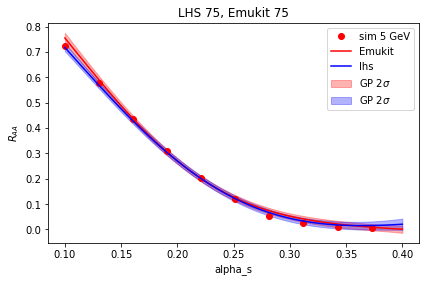

Working on design 4Working on design 3

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


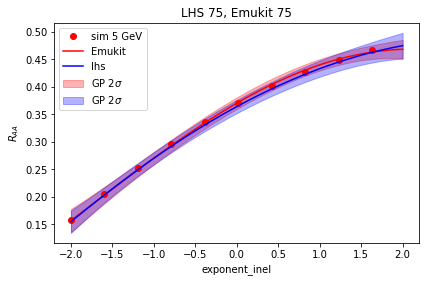

Working on design 5
Working on design 3Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


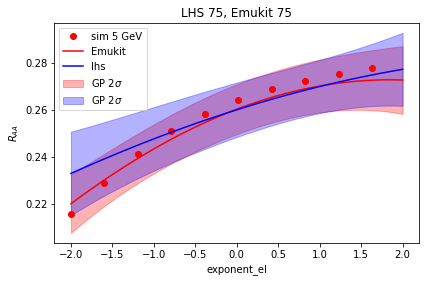

Working on design 3
Working on design 4


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 5Working on design 2




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7Working on design 8

Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


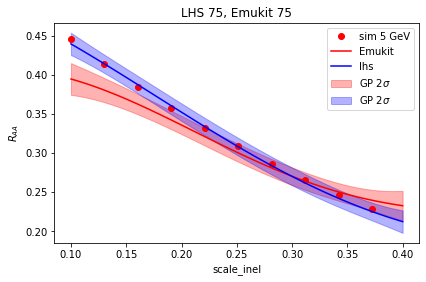

Working on design 4Working on design 5

Working on design 3

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.93 minutes


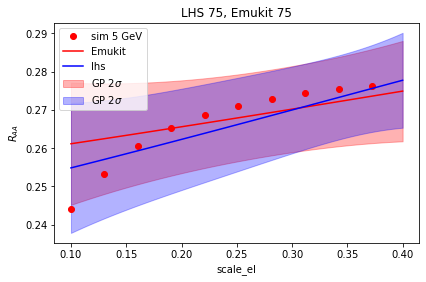

#################### 
 ######################
Validation score for 4 iteration AL 0.020010366346856823 , LHS 0.017122773032779957
######################
AL before hyperparameters are


Name : GP regression
Objective : -167.63757858558102
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.13694746416286666  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  1.8164375912591796e-05  |      +ve      |        
design is [[ 0.12325 -1.05    -1.47     0.13525  0.13675]
 [ 0.37825  1.57     1.93     0.24175  0.14425]
 [ 0.30025  1.73    -0.09     0.36925  0.30625]
 [ 0.24625  0.19     1.97     0.36325  0.17125]
 [ 0.38425  1.97     0.95     0.25975  0.16375]]
Working on design 4Working on design 5Working on design 3Working on design 1




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


In [24]:
import time
time_iter = []
bs = 5

# The active learning GP
GP_al = gp_array[0]
    
 # LHS GP
GP_lhs = gp_array[1]

design = LatinDesign(parameter_space) 
# The number of design point here should be choosen wisely. Need to adjust and see how things change
LH = design.get_samples(200)

validation_array = [compare_gp(GP_al, GP_lhs)]
for i in range(0,10):
    st = time.time()
   # val = compare_gp(GP_al, GP_lhs)
#    integrated_var = ModelVariance(model = GP_al)
    #integrated_var = IntegratedVarianceReduction(model = GP_al, space=parameter_space)
#    expdesign_loop = ExperimentalDesignLoop(model = GP_al,
#                                         space = parameter_space,
#                                         acquisition = integrated_var,
#                                         batch_size = bs)
    print('######################')
    print('AL before hyperparameters are\n')
    print(GP_al.model)
#    ed=expdesign_loop.run_loop(f,1)
    GP_al, LH = lhs_max_var(GP_al, LH, bs)
    print('######################')
    print('AL After hyperparameters are \n')
    print(GP_al.model)    

    x_new = np.array(lhs_df[lhs_df['step'] == 50+bs*(i+1)])[:,1:6]
    y_new = np.array(lhs_df[lhs_df['step'] == 50+bs*(i+1)])[:,6:]
    GP_lhs.set_data(x_new, y_new[:,  pT_obs])
    print('######################')
    print('LHS before hyperparameters are\n')
    print(GP_lhs.model)
    GP_lhs.optimize()
    print('######################')
    print('LHS After hyperparameters are\n')
    print(GP_lhs.model)
    
    print(f'time taken for the iteraton {i} is {time.time()-st} S')
    time_iter.append(time.time()-st)
    val = compare_gp(GP_al, GP_lhs)
    validation_array.append(val)
    print('#################### \n ######################')
    print(f'Validation score for {i} iteration AL {val[0]} , LHS {val[1]}')

In [35]:
old_validation = [[0.015099546965741175, 0.015099552844838757],
 [0.023060398823430726, 0.014932625747186774],
 [0.02115327094338211, 0.013247679371191671],
 [0.022260950304346147, 0.012211520712029215],
 [0.021803385201655767, 0.011530018336085015],
 [0.021057855194992873, 0.011241583475815047],
 [0.021330339197522967, 0.011925167901296413],
 [0.014931524046813575, 0.012433464873415085],
 [0.011531871650786896, 0.01088188278817377],
 [0.010002430371088096, 0.01050492644327509],
 [0.010175519565874452, 0.01107140662147926]]

In [36]:
old_validation = np.array(old_validation)

In [37]:
validation_array

array([[0.02156159, 0.02156161],
       [0.0197624 , 0.01851499],
       [0.01941467, 0.01893261],
       [0.02258212, 0.01728191],
       [0.02033108, 0.01340707],
       [0.02001037, 0.01712277],
       [0.0195644 , 0.01390543],
       [0.01732383, 0.01436522],
       [0.01343646, 0.01354968],
       [0.01314122, 0.01427692],
       [0.01301688, 0.00987208]])

In [38]:
import pickle

In [39]:
with open('AL_lhs_max_var_50_gp' , "wb") as f:
     pickle.dump(gp_array[0], f)  
        
with open('LHS_max_var_50_gp' , "wb") as f:
     pickle.dump(gp_array[1], f)          

Text(0.5, 0, 'Number of training points')

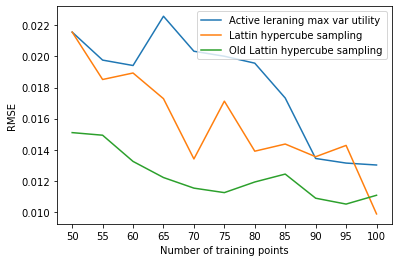

In [40]:
validation_array = np.array(validation_array)
fig, ax = plt.subplots()
n_train = np.arange(start_n,105,5)
ax.plot(n_train, validation_array[:,0], label = 'Active leraning max var utility')
ax.plot(n_train, validation_array[:,1], label = 'Lattin hypercube sampling')
ax.plot(n_train, old_validation[:,1], label = 'Old Lattin hypercube sampling')
ax.set_xticks(n_train)
ax.legend()
ax.set_ylabel('RMSE')
ax.set_xlabel('Number of training points')

Text(0.5, 0, 'Number of training points')

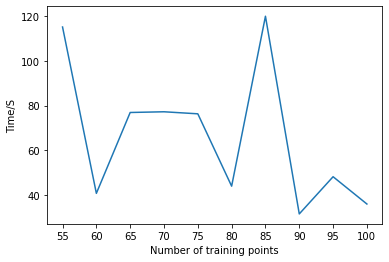

In [41]:
time_ar = np.array(time_iter)
fig, ax = plt.subplots()
n_train = np.arange(55,105,5)
ax.plot(n_train, time_ar, label = 'Active leraning time')
ax.set_xticks(n_train)
ax.set_ylabel('Time/S')
ax.set_xlabel('Number of training points')

In [42]:
AL_design = GP_al.X[start_n:,:]
print(AL_design.shape)

(50, 5)


In [43]:
c_l = np.array([i*np.ones(bs) for i in np.arange(0,AL_design.shape[0],bs)]).reshape(-1,1)

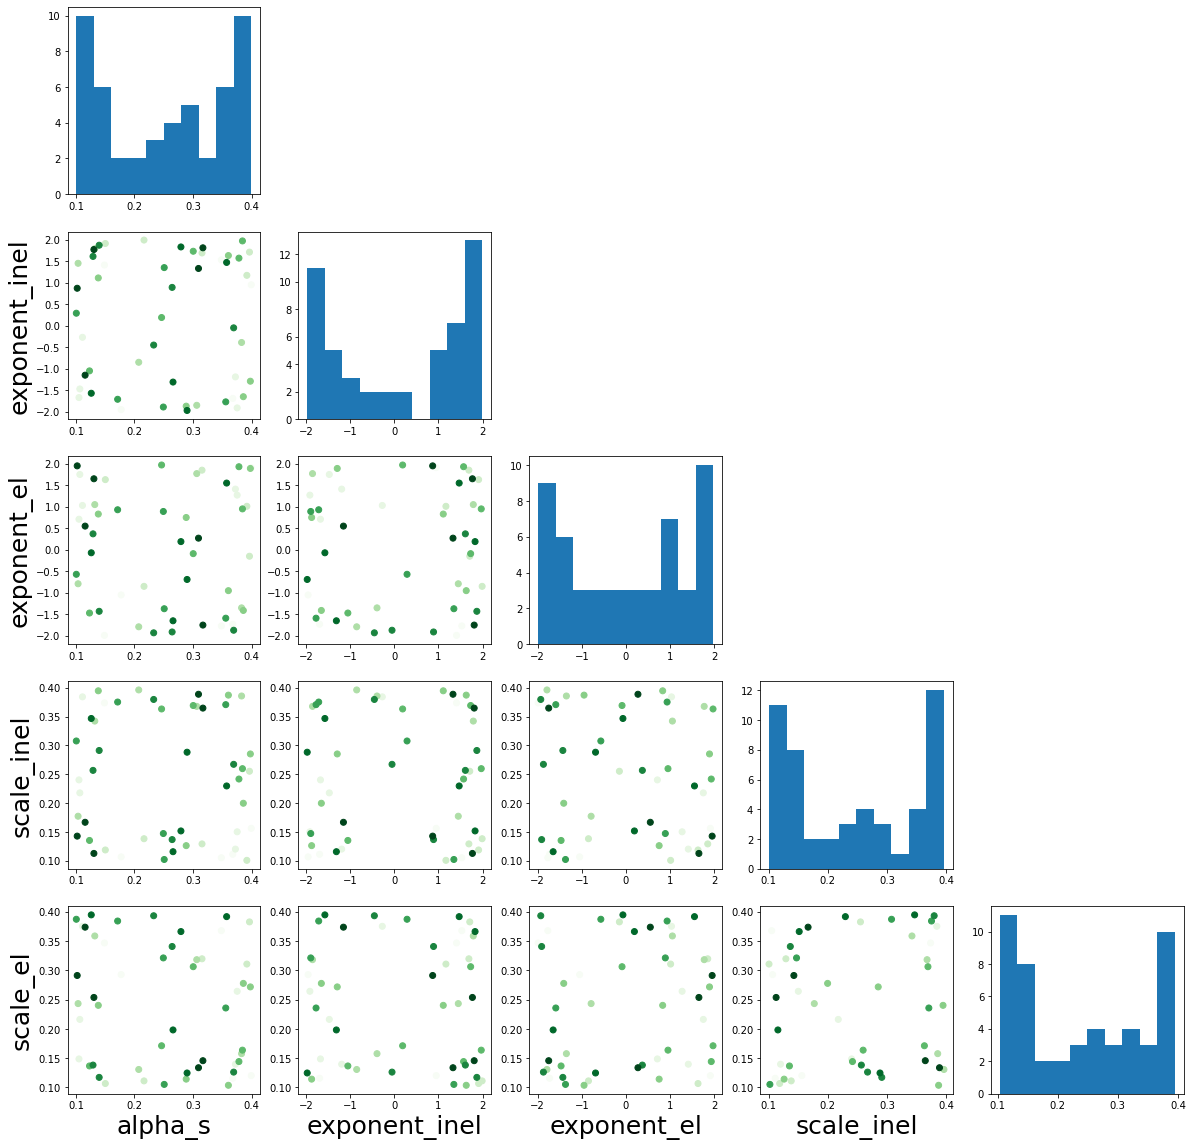

In [44]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, axs= plt.subplots(5,5, figsize=(20,20))
for row in range(0,5):
    for clmn in range(0,5):
        if row < clmn:
            ax = axs[row,clmn]
            ax.axis('off')
            continue
        if row == clmn:
            ax = axs[row,clmn]
            ax.hist(AL_design[:,clmn])
        else:
            ax= axs[row,clmn]
            if row == 4:
                ax.set_xlabel(list(prior_ranges.keys())[clmn], fontsize =25)
            if clmn == 0:
                ax.set_ylabel(list(prior_ranges.keys())[row], fontsize =25)
            ax.scatter(AL_design[:,clmn],AL_design[:,row], c = c_l, cmap='Greens')